In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, cross_decomposition, manifold
from sklearn.metrics import mean_squared_error, r2_score

cancer = datasets.load_breast_cancer()

cancer_X = cancer.data
cancer_Y = cancer.target

print(cancer_X.shape)

(569, 30)


In [ ]:
cancer_X_train = cancer_X[:-20]
cancer_X_test = cancer_X[-20:]

cancer_Y_train = cancer_Y[:-20]
cancer_Y_test = cancer_Y[-20:]

lasso_regr = linear_model.Lasso()
lasso_regr.fit(cancer_X_train, cancer_Y_train)
cancer_Y_pred = lasso_regr.predict(cancer_X_test)

print('Mean squared error: %f' % mean_squared_error(cancer_Y_test, cancer_Y_pred))

ridge_regr = linear_model.Ridge()
ridge_regr.fit(cancer_X_train, cancer_Y_train)
cancer_Y_pred_ridge = ridge_regr.predict(cancer_X_test)

print('Mean squared error: %f' % mean_squared_error(cancer_Y_test, cancer_Y_pred_ridge))

Mean squared error: 0.041460
Mean squared error: 0.056980


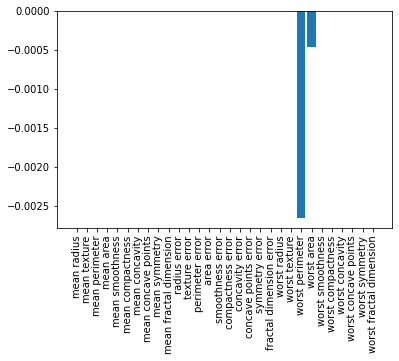

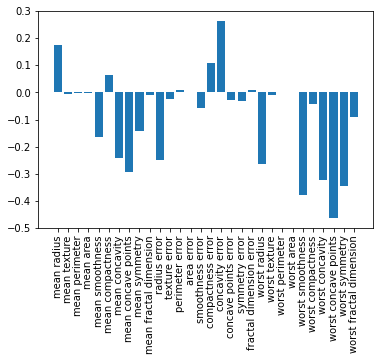

In [ ]:
plt.bar(cancer.feature_names, lasso_regr.coef_, tick_label=cancer.feature_names)
plt.xticks(rotation=90)
plt.show()

plt.bar(cancer.feature_names, ridge_regr.coef_, tick_label=cancer.feature_names)
plt.xticks(rotation=90)
plt.show()

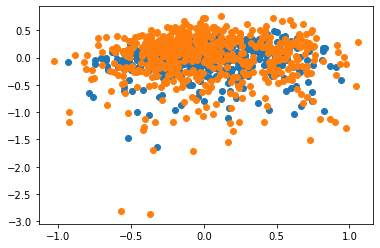

In [ ]:
x = cancer.data[:, :15]
y = cancer.data[:, 15:]
cca = cross_decomposition.CCA(n_components=2)
cca.fit(x, y)
Z_x, Z_y = cca.fit_transform(x, y)
plt.scatter(Z_x[:,0], Z_x[:,1])
plt.scatter(Z_y[:,0], Z_y[:,1])

['malignant' 'benign']


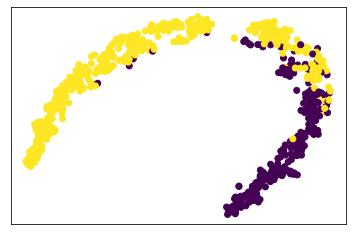

In [ ]:
c_x = cancer.data
c_y = cancer.target

tsne = manifold.TSNE(n_components=2)
tsne.fit(c_x)
Z = tsne.fit_transform(c_x)

plt.scatter(Z[:, 0], Z[:, 1], c=c_y)

plt.xticks(())
plt.yticks(())

plt.show()